# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here:

For this analysis I compared the efficacy of 4 different cancer drugs Capomulin, Ramicane, Infubinol, and Ceftamin  on different Mouses.  One of the first observations is that Ramicane and Capomulin saw the lowest final average tumor volumes all four drugs being tested. Digging deeper into the data you can see with the liner regression model there is an overall correlation of 0.84, but when you look at the p-value you will see that it is close to zero, which means that the comparison isn't statistically significant.

In conclusion, there is a positive correlation between average tumor size and weight


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df = study_results.merge(mouse_metadata, on = 'Mouse ID')

# Display the data table for preview
mouse_metadata
study_results
mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_dupe = mice_df[mice_df.duplicated(subset=['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()
mouse_dupe

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_ID = mice_df.loc[mice_df['Mouse ID'].isin(mouse_dupe), :]
dup_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = mice_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
# clean_df
clean_df = mice_df.drop(dup_ID.index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()


median = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()

var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

stddv = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

sem



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_df = pd.DataFrame({
    
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : var,
    "Tumor Volume Std. Dev" : stddv,
    "Tumor Volume Std. Err." : sem,

    
})

stat_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

clean_agg_df = clean_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
clean_agg_df



# Using the aggregation method, produce the same summary statistics in a single line
clean_renamed = clean_agg_df.rename(columns = {
    'mean' : "Mean Tumor Volume", 
    'median' : "Median Tumor Volume", 
    'var' : "Tumor Volume Variance", 
    'std' : 'Tumor Volume Std. Dev', 
    'sem': 'Tumor Volume Std. Err.'})

clean_renamed

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                           
             Tumor Volume Std. Dev Tumor Volume Std. Err.  
Drug Regimen                                               
Capomulin                 4.994774               0.329346  
Ceftamin                  6.268188               0.469821  
Infubinol                 6.567243               0.492236  
Ketapril                  8.279709               0.603860  
Naftisol                  8.134708               0.596466  
Placebo                   7.821003               0.581331  
Propriva                  6.622085               0.544332  
Ramicane                  4.846308               0.320955  
Stelasyn                  7.710419               0.573111  
Zoniferol                 6.966589               0.516398

## Bar and Pie Charts

[Text(0.5, 0, 'Drug Regimen'),
 Text(0, 0.5, 'Number Of Observed Mouse Timepoint')]

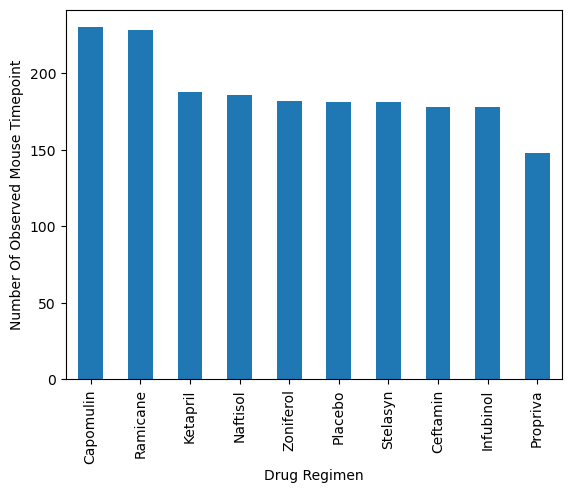

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

group_df = clean_df.groupby(['Drug Regimen'])
group_df

total_mice = group_df['Timepoint'].count().sort_values(ascending = False)
total_mice

bar = total_mice.plot(kind = 'bar').set(xlabel= 'Drug Regimen' , ylabel= 'Number Of Observed Mouse Timepoint')

bar



In [10]:
total_mice


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

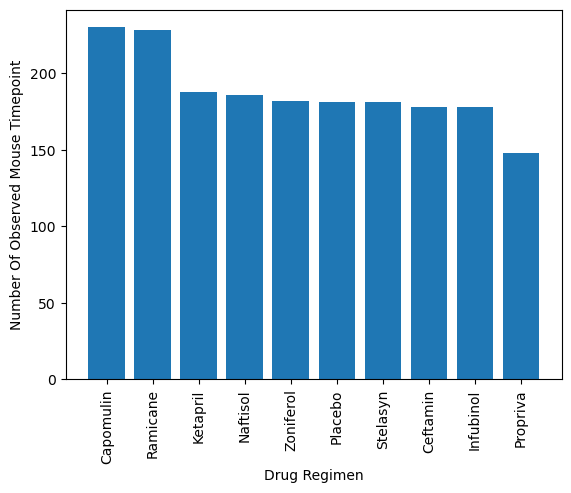

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.bar(total_mice.index, total_mice )

plt.xlabel('Drug Regimen')

plt.ylabel('Number Of Observed Mouse Timepoint')

plt.xticks(rotation = (90))


Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64

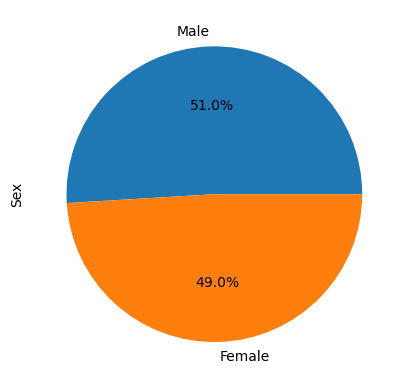

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mf_df = clean_df.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending = False)

pie = mf_df.plot(kind = 'pie', autopct='%1.1f%%').set( ylabel= 'Sex')

mf_df
                                  

    



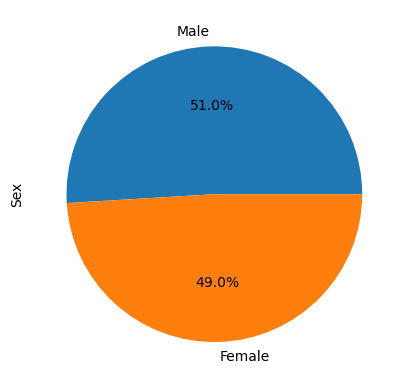

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mf_df,labels = ['Male', 'Female'],   autopct= '%1.1f%%')

plt.ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(clean_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()).reset_index()

max_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_df = pd.merge(max_tp,clean_df, on= ['Drug Regimen', 'Mouse ID', 'Timepoint'], how='left')

merge_df



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list :
    temp_data = merge_df.loc[merge_df['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    
    tumor_vol_list.append(temp_data)
    
    quartiles = temp_data.quantile([.25, .50, .75])
    
    lower_quartile = quartiles[.25]
    
    upper_quartile = quartiles[.75]
    
    iqr = upper_quartile -lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outlier = temp_data.loc[(temp_data < lower_bound) | (temp_data > upper_bound)]
    
    print (f"{treatment}'s potential outlier: {outlier}")
  

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


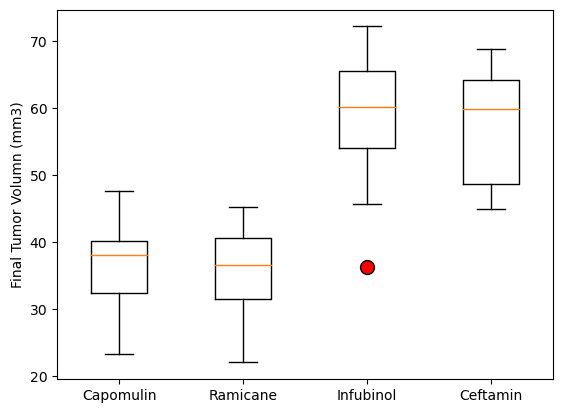

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=dict(markerfacecolor='r', markersize=10)) 

plt.ylabel('Final Tumor Volumn (mm3)')

plt.show()




## Line and Scatter Plots

In [17]:
special_mouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']

special_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


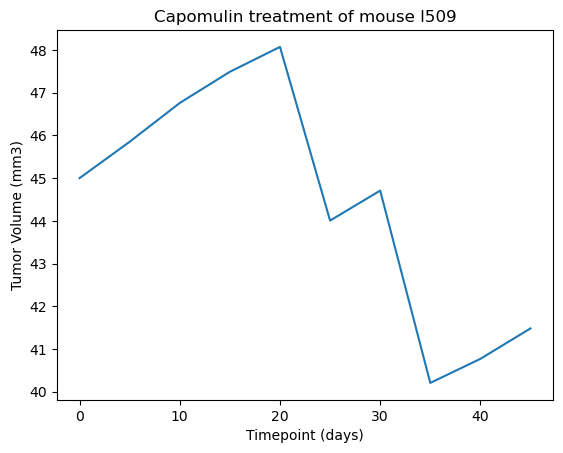

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.plot(special_mouse['Timepoint'], special_mouse['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')

plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin treatment of mouse l509')

plt.show()

In [22]:
capomulin_mouse = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']

capomulin_final = capomulin_mouse.groupby(by = 'Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()


capomulin_final.sort_values(by='Tumor Volume (mm3)', ascending=True)




,Weight (g),Tumor Volume (mm3)
Mouse ID,,
s185,17.0,34.559143
m601,17.0,34.847470
x401,15.0,36.182040
f966,17.0,36.505973
r554,17.0,36.509212
y793,17.0,38.506829
m957,19.0,39.049816
i738,20.0,39.141053
t565,17.0,39.328725


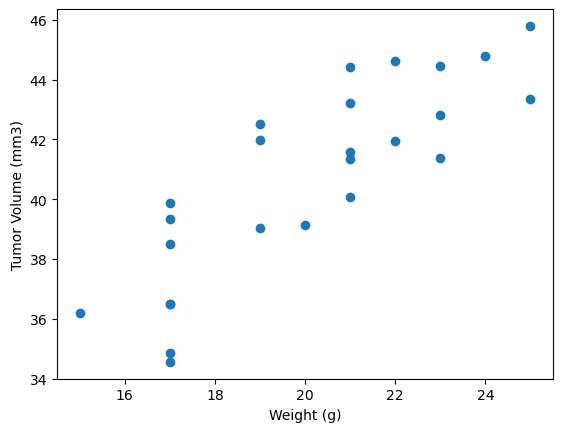

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_final['Weight (g)'], capomulin_final['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')

plt.ylabel('Tumor Volume (mm3)')



plt.show()


## Correlation and Regression

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

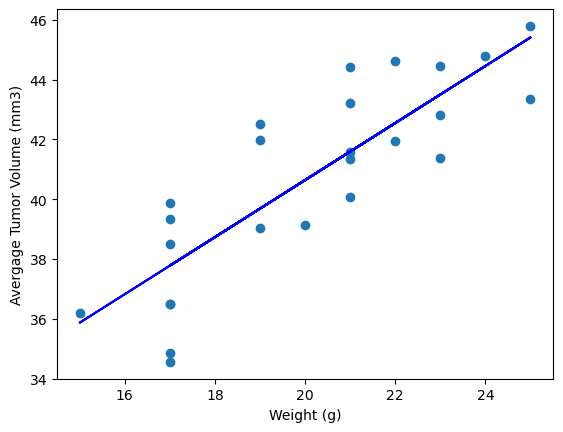

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

m_slope, m_int, _, _, _ = st.linregress(capomulin_final['Weight (g)'],capomulin_final["Tumor Volume (mm3)"])
fct_volume = []

# y = a + bx
for weight in capomulin_final['Weight (g)']:
    fct_volume.append(m_int + m_slope*weight)

statistics = st.pearsonr(capomulin_final["Weight (g)"],capomulin_final["Tumor Volume (mm3)"])


plt.scatter(capomulin_final["Weight (g)"], capomulin_final["Tumor Volume (mm3)"])
plt.plot(capomulin_final["Weight (g)"],fct_volume, color="blue");
plt.ylabel("Avergage Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
statistics